# House Prediction case study in python

The goal is to create a machine learning model which can predict the average price of a house based on its characteristics.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data into python
df=pd.read_csv('C:/Users/Akshay Singh/Desktop/Python_Case_Study/BostonHousingData.csv', encoding='latin')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Data description(Data Dictionary)

#### The business meaning of each column in the data is as below

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars

PTRATIO - pupil/teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

# DATA EXPLORATION- To understand the overall data

In [4]:
#Number of rows and columns
df.shape

(506, 14)

In [5]:
##Descriptive statistics of the data
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#Summarized information of data(Data types, Missing values, total rows etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
# Number of Unique variable in each column
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [8]:
#Any Null-Value
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# Removing duplicate rows if any
df=df.drop_duplicates()

In [10]:
#checking shape of Data after removing Duplicates
df.shape

(506, 14)

#### --No Missing Values in Data


# Basic Data Exploration Results
CRIM - Continuous. Selected.

ZN - Continuous. Selected.

INDUS - Continuous. Selected.

CHAS - Categorical. Selected.

NOX - Continuous. Selected.

RM - Continuous. Selected.

AGE - Continuous. Selected.

DIS - Continuous. Selected.

RAD - Categorical. Selected.

TAX - Continuous. Selected.

PTRATIO - Continuous. Selected.

B - Continuous. Selected.

LSTAT - Continuous. Selected.

MEDV - Continuous. Selected.

###### Goal- Create a ML model which can predict the price( MEDV ) of a house
Target Variable: MEDV

Predictors: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT       
###### Determining the type of Machine Learning
Based on the problem statement I can understand that I  need to create a supervised ML Regression model, as the target variable is Continuous.

# Looking at the distribution of Target variable

In [11]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

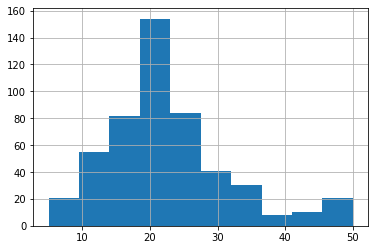

In [12]:
# Creating Bar chart for the Target variable
df['MEDV'].hist()

### The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Visual Exploratory Data Analysis of Predictive Variables
### 1.Visualize distribution of all the categorical Predictor - CHAS,RAD

In [13]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

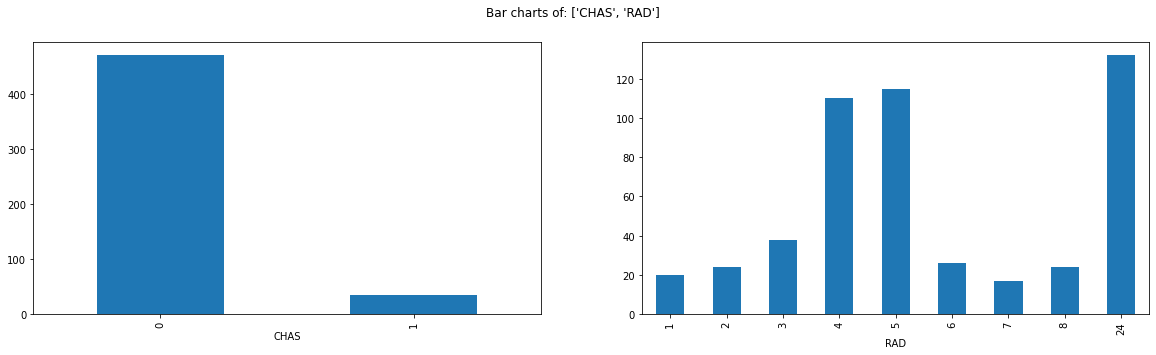

In [14]:
# Calling the function
PlotBarCharts(inpData=df, colsToPlot=['CHAS','RAD'])

### Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In this data, "CHAS" is skewed. There is just one bar which is dominating and other one have very less rows. Such columns may not be correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

We confirm this in the correlation analysis section and take a final call to select or reject the column.

### 2.Visualize distribution of all the Continuous Predictor- CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBDFB24190>,
      dtype=object)

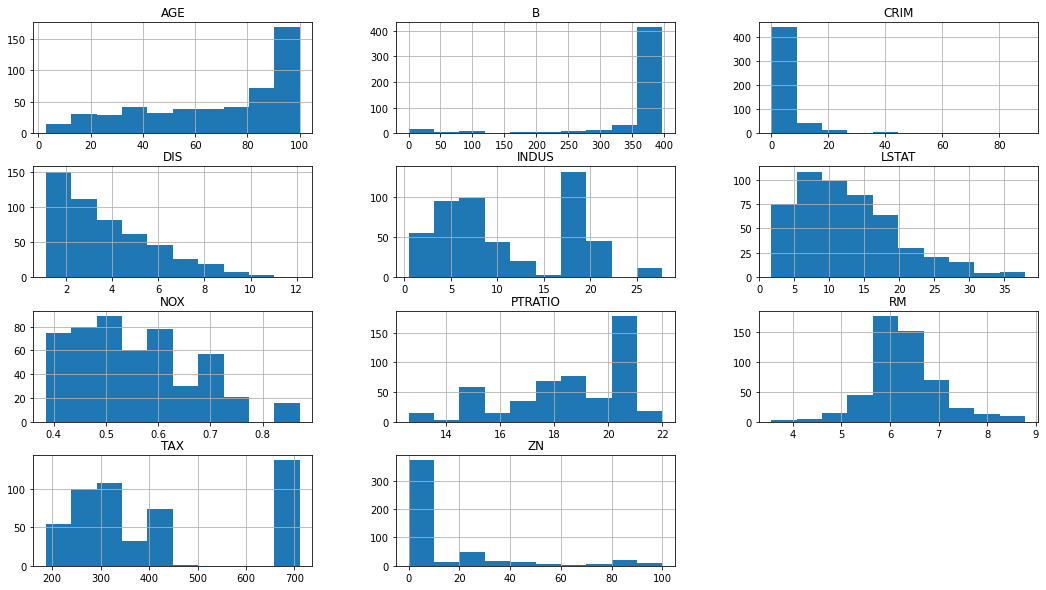

In [15]:
# Plotting histograms of multiple columns together
df.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

# Histogram Interpretation
The X-axis shows the range of values and Y-axis represent the number of values in that range.

In this data,few columns seems to be skewed.

There are many outliers in seviral columns

We confirm this in the correlation analysis section and take a final call to select or reject the column.

#Outlier treatment

#### Replacing outliers for 'CRIM'

In [16]:
# Finding nearest values to 60 mark
df['CRIM'][df['CRIM']<60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

In [17]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Replacing outliers with nearest possibe value
df['CRIM'][df['CRIM']>60] =51.13

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBE053C0D0>]],
      dtype=object)

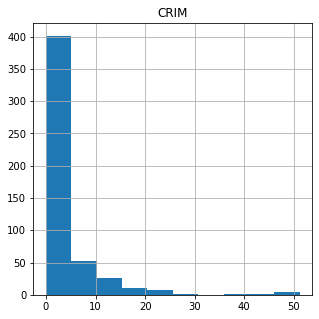

In [19]:
df.hist(['CRIM'], figsize=(5,5))

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values by using corrilation matix or ANOVA or Chi-Square tests.

### Relationship exploration: Categorical Vs Continuous
##### Visual Analysis

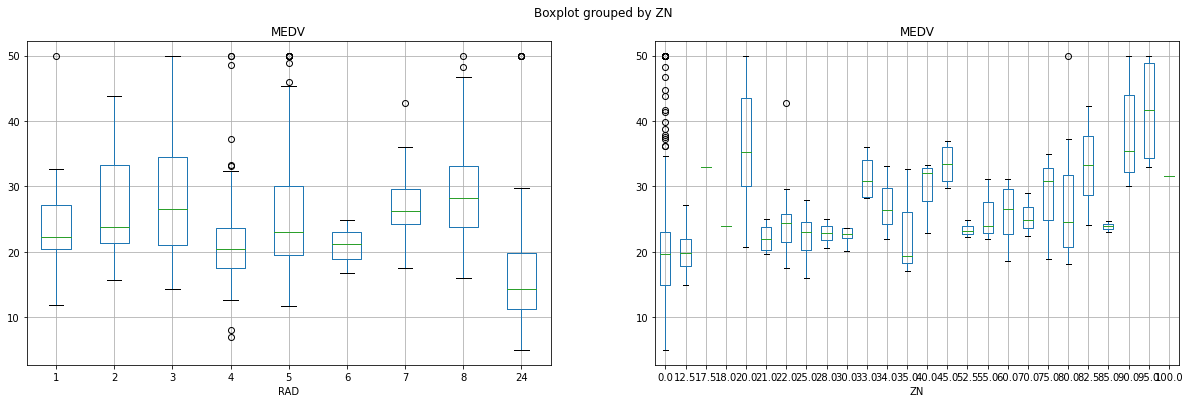

In [20]:
# Box plots for Categorical Target Variable "MEDV" and continuous predictors
CategoricalColsList=['RAD', 'ZN']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(20 , 6))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [21]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print(' ANOVA Results \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
    
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [22]:
# Calling the function to check which categorical variables are correlated with target
FunctionAnova(inpData=df, TargetVariable='MEDV', CategoricalPredictorList=['RAD', 'ZN'])

 ANOVA Results 

RAD is correlated with MEDV | P-Value: 3.1256493316010175e-24
ZN is correlated with MEDV | P-Value: 2.1871940303958843e-17


['RAD', 'ZN']

### Result
##### All categorical variables are correlated with the Target variable.

##### Final selected Categorical columns: 'RAD', 'ZN'

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
##### Visual Analysis

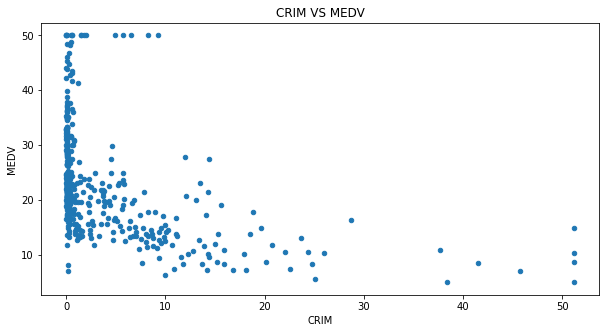

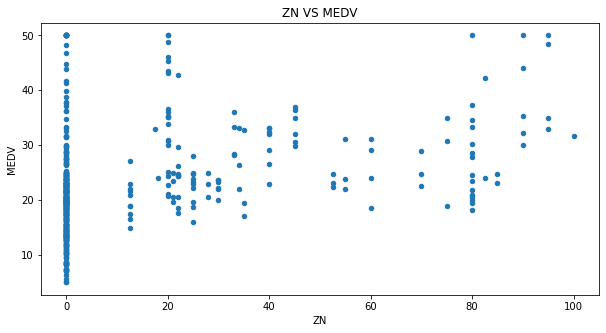

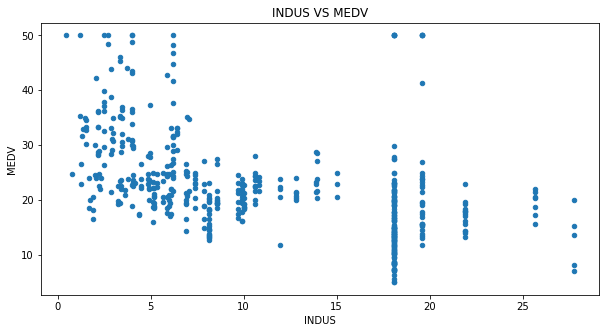

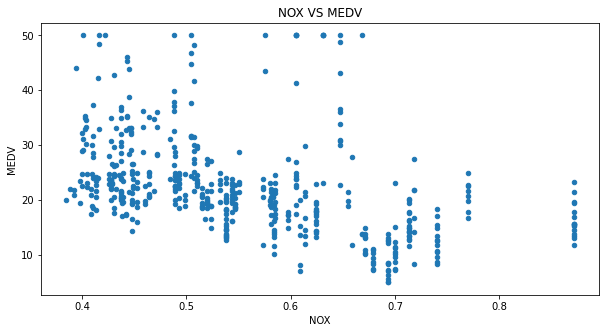

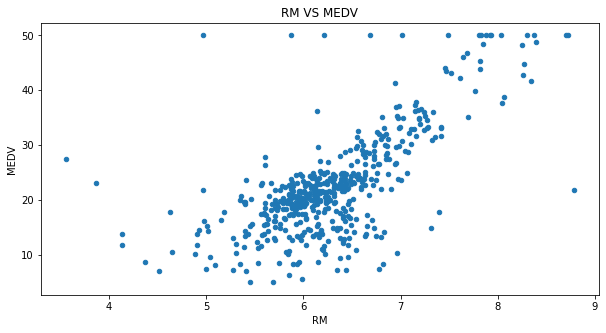

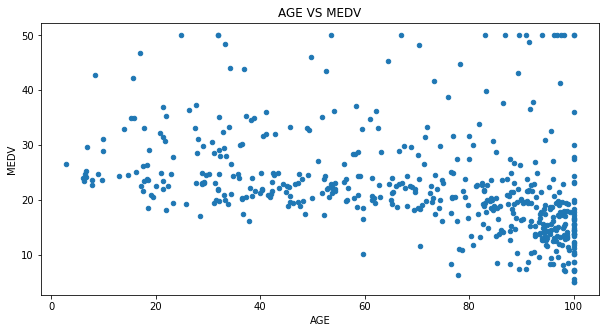

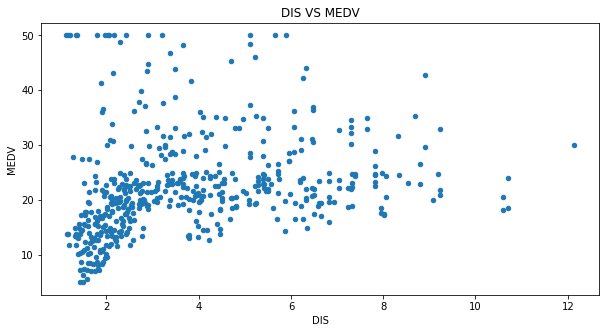

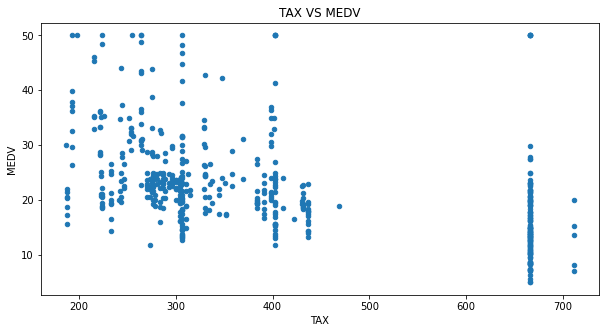

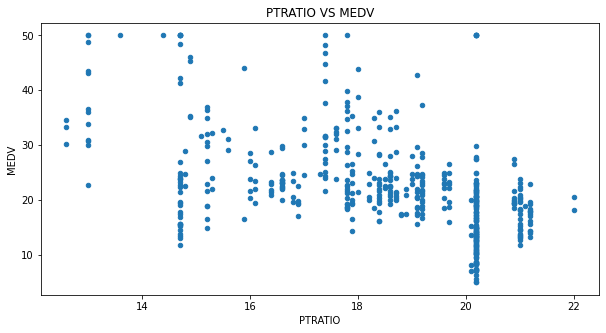

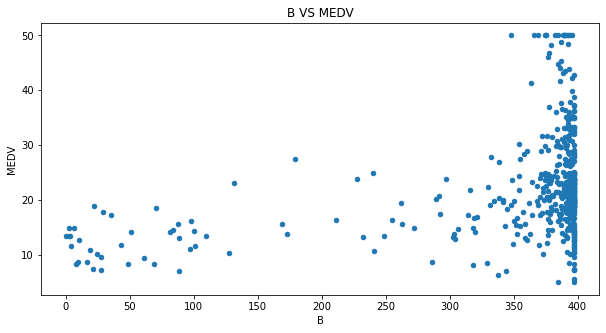

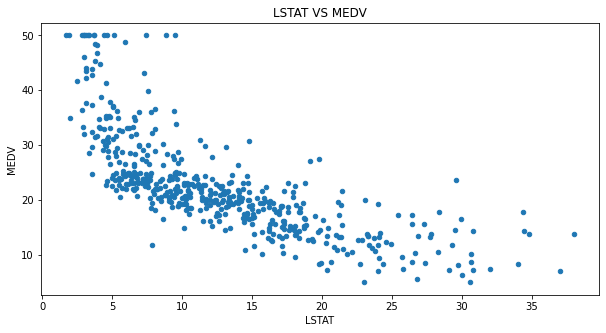

In [23]:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='MEDV', figsize=(10,5), title=predictor+" VS "+ 'MEDV')

##### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [24]:
# Calculating correlation matrix
ContinuousCols=['MEDV','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.419265,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.419265,1.000000,-0.222332,0.450375,0.466020,-0.257310,0.388784,-0.417941,0.643998,0.319489,-0.429858,0.508483
ZN,0.360445,-0.222332,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.450375,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.466020,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.257310,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.388784,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.417941,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,-0.468536,0.643998,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,-0.507787,0.319489,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


In [25]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
CorrelationData['MEDV'][abs(CorrelationData['MEDV']) > 0.5 ]

MEDV       1.000000
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

#### Final selected Continuous columns: 'RM', 'PTRATIO','LSTAT'

# Selecting final predictors for Machine Learning

In [26]:
SelectedColumns=['RM', 'PTRATIO','LSTAT', 'RAD', 'ZN']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,RM,PTRATIO,LSTAT,RAD,ZN
0,6.575,15.3,4.98,1,18.0
1,6.421,17.8,9.14,2,0.0
2,7.185,17.8,4.03,2,0.0
3,6.998,18.7,2.94,3,0.0
4,7.147,18.7,5.33,3,0.0


In [27]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForMLHP.pkl')

In [28]:
# Converting the nominal variable to numeric using get_dummies()
DataForML_Numeric=pd.get_dummies(DataForML)

In [29]:
# Adding Target Variable to the data
DataForML_Numeric['MEDV']=df['MEDV'] 
DataForML_Numeric.head()

,RM,PTRATIO,LSTAT,RAD,ZN,MEDV
0,6.575,15.3,4.98,1,18.0,24.0
1,6.421,17.8,9.14,2,0.0,21.6
2,7.185,17.8,4.03,2,0.0,34.7
3,6.998,18.7,2.94,3,0.0,33.4
4,7.147,18.7,5.33,3,0.0,36.2


# Machine Learning: Splitting the data into Training and Testing sample

In [30]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'RAD', 'ZN', 'MEDV'], dtype='object')

In [31]:
# Separate Target Variable and Predictor Variables
TargetVariable='MEDV'
Predictors=['RM', 'PTRATIO', 'LSTAT', 'RAD', 'ZN']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [32]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

### Normalization of data

In [33]:
### Normalization of data ###
from sklearn.preprocessing import MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [34]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 5)
(354,)
(152, 5)
(152,)


# Multiple Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

LinearRegression()


In [36]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

R2 Value: 0.6849859935296986


In [37]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

   MEDV  PredictedMEDV
0  14.1           19.0
1  13.4           14.0
2  22.1           26.0
3  41.7           37.0
4  28.5           30.0
Mean Accuracy on test data: 79.87007894767376
Median Accuracy on test data: 86.98108572832228


In [38]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [88.23444966 89.38394288 83.69138384 82.45700449 85.93525106 88.0694659
 84.21108522 48.01531498 49.70204889 85.21194959]

Final Average Accuracy of the model: 78.49


# Decision Trees

In [39]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=4,criterion='mse')

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

DecisionTreeRegressor(max_depth=4)


In [40]:
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

R2 Value: 0.8772269384933192


In [41]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

   MEDV  PredictedMEDV
0  14.1           16.0
1  13.4           16.0
2  22.1           24.0
3  41.7           47.0
4  28.5           33.0
Mean Accuracy on test data: 83.53495580953359
Median Accuracy on test data: 89.08612001832341


In [42]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [87.39651162 90.84166111 88.42872724 87.24743494 87.26894614 88.65274131
 85.75512046 62.34597773 74.6331198  73.83622753]

Final Average Accuracy of the model: 82.64


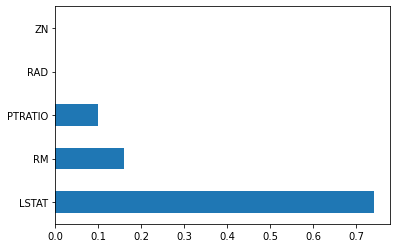

In [43]:
# Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Random Forest (Bagging of multiple Decision Trees)

In [44]:
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor()

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

RandomForestRegressor()


In [45]:
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

R2 Value: 0.9747147703222737


In [46]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

   MEDV  PredictedMEDV
0  14.1           13.0
1  13.4           16.0
2  22.1           24.0
3  41.7           45.0
4  28.5           34.0
Mean Accuracy on test data: 84.5974032699846
Median Accuracy on test data: 91.03465595178302


In [47]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation 
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [87.78517243 92.48849197 86.20211466 88.67406805 87.83804536 90.84886476
 89.08480526 61.74848873 73.69058341 79.26650543]

Final Average Accuracy of the model: 83.76


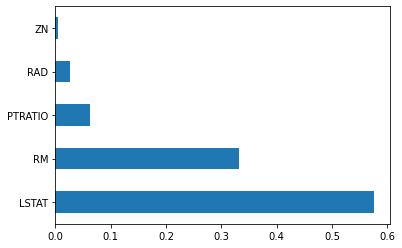

In [48]:
# Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Adaboost (Boosting of multiple Decision Trees)

In [49]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=5)
RegModel = AdaBoostRegressor(n_estimators=200, base_estimator=DTR ,learning_rate=0.04)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

In [50]:
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

R2 Value: 0.9411668715967815


In [51]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

   MEDV  PredictedMEDV
0  14.1           15.0
1  13.4           16.0
2  22.1           24.0
3  41.7           48.0
4  28.5           33.0
Mean Accuracy on test data: 84.93856917770242
Median Accuracy on test data: 91.17596541951735


In [52]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [88.94924923 92.35565917 88.00073501 87.84196957 88.84665865 90.12012465
 86.40277102 60.88912688 74.66830373 81.93531776]

Final Average Accuracy of the model: 84.0


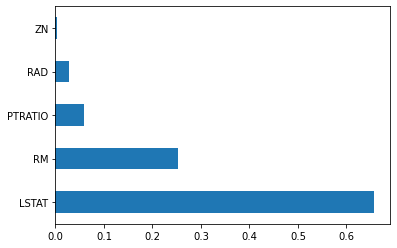

In [53]:
# Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Xtreme Gradient Boosting (XGBoost)

In [54]:
from xgboost import XGBRegressor
RegModel=XGBRegressor()

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

In [55]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

R2 Value: 0.9997990307105129


In [56]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


   MEDV  PredictedMEDV
0  14.1           13.0
1  13.4           16.0
2  22.1           24.0
3  41.7           47.0
4  28.5           32.0
Mean Accuracy on test data: 84.36778217563271
Median Accuracy on test data: 89.91017964071857


In [57]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [84.97082753 91.95559886 81.57400739 86.90028965 87.23281956 89.18567265
 86.17440286 61.23453918 73.27978429 80.22404577]

Final Average Accuracy of the model: 82.27


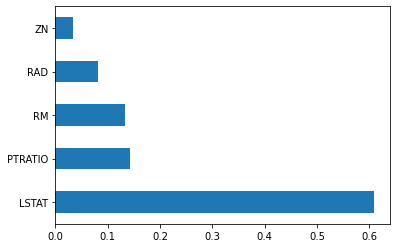

In [58]:
# Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# K-Nearest Neighbor(KNN)

In [59]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

KNeighborsRegressor(n_neighbors=3)


In [60]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

R2 Value: 0.8822753843549099


In [61]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)


   MEDV  PredictedMEDV
0  14.1           13.0
1  13.4           15.0
2  22.1           24.0
3  41.7           45.0
4  28.5           29.0
Mean Accuracy on test data: 84.05476779880865
Median Accuracy on test data: 90.64394505622269


In [62]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [86.57055637 88.85617214 85.66136141 87.20058458 87.76384248 87.53564606
 85.92526423 63.08097712 74.12283263 76.29619358]

Final Average Accuracy of the model: 82.3


# Support Vector Machines(SVM)

In [63]:
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

SVR(C=50, gamma=0.01)


In [64]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

R2 Value: 0.5929493561099113


In [65]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

   MEDV  PredictedMEDV
0  14.1           17.0
1  13.4           17.0
2  22.1           24.0
3  41.7           30.0
4  28.5           28.0
Mean Accuracy on test data: 84.05476779880865
Median Accuracy on test data: 90.64394505622269


In [66]:
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [88.40850035 90.41949293 88.6062547  81.31983947 83.0417645  83.88026041
 87.47726829 60.64900124 61.25775816 81.09447852]

Final Average Accuracy of the model: 80.62


# FINAL ACCURACY OUTPUT OF ALL THE MODELS
#### Linear Regression
R2 Value:68.50% , Mean Accuracy:79.87% , Median Accuracy:86.98% , Cross Validation:78.49% 
#### Decision Tree
R2 Value:83.53% ,  Mean Accuracy:83.53% , Median Accuracy:89.09% , Cross Validation:82.64%
#### Ramdom Forest
R2 Value:97.56% , Mean Accuracy:84.90% , Median Accuracy:91.85% , Cross Validation:83.75%
#### AdaBoost
R2 Value:94% , Mean Accuracy:84.95% , Median Accuracy:91.30% , Cross Validation:83.83%
#### XBoost
R2 Value:100% , Mean Accuracy:84.37% , Median Accuracy:89.91% , Cross Validation:82.27%
#### KNN
R2 Value:82.23% , Mean Accuracy:84.05% Median Accuracy:90.64% , Cross Validation:82.30%
#### SVM
R2 Value:59.30% , Mean Accuracy:84.05% Median Accuracy:90.64% , Cross Validation:80.62%

# Deployment of the Model
Based on the above trials I select that algorithm which produces the best average accuracy, and the difference between R2,averge accuracy and cross validation is the least

I am choosing Decision Trees as the final model

Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

In this data, the most important predictor variables are 'LSTAT', 'RM', and 'PTRATIO'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [67]:
# Separate Target Variable and Predictor Variables
TargetVariable='MEDV'

# Selecting the final set of predictors for the deployment
Predictors=['LSTAT', 'RM', 'PTRATIO']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

In [68]:
##Normalization of data
from sklearn.preprocessing import MinMaxScaler

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(506, 3)
(506,)


# Cross validating the final model accuracy with less predictors

In [69]:
# choose from different tunable hyper parameters
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=4,criterion='mse')

In [70]:
# Running 10-Fold Cross validation
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [87.39651162 90.02656434 88.42872724 87.26631632 87.56698384 88.65274131
 84.17192553 62.34597773 74.6331198  79.95175895]

Final Average Accuracy of the model: 83.04


In [71]:
#Retraining the model using 100% data
Final_dtr_Model=RegModel.fit(X,y)

In [72]:
# Save the model as a serialized file which can be stored anywhere
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
with open('Final_dte_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_dtr_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Akshay Singh\Desktop\data


In [73]:
#Create a python function
# This Function can be called from any from any front end tool/website
import time
start = time.time()

def PricePredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['LSTAT', 'RM', 'PTRATIO']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_dte_Model.pkl', 'rb') as fileReadStream:
        NB_model=pickle.load(fileReadStream)
        
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=NB_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

end = time.time()
print(end - start, "seconds")

0.0 seconds


In [74]:
# Calling the function for some loan applications
NewSampleData=pd.DataFrame(data=[[4.98,6.575,15.3],[4.98,3.2,10.3]], columns=['LSTAT', 'RM', 'PTRATIO'])

print(NewSampleData)
# Calling the Function for prediction
PricePredictResult(InputData= NewSampleData)

   LSTAT     RM  PTRATIO
0   4.98  6.575     15.3
1   4.98  3.200     10.3


,Predicted Status
0,24.392623
1,24.392623


# Deploying a predictive model as an API

In [75]:
def FunctionGeneratePrediction(inp_LSTAT , inp_RM, inp_PTRATIO):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(data=[[inp_LSTAT , inp_RM, inp_PTRATIO]],columns=['LSTAT', 'RM', 'PTRATIO'])

    # Calling the function defined above using the input parameters
    Predictions=PricePredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_LSTAT=4.98,inp_RM=6.5,inp_PTRATIO=15.3)

'{"Predicted Status":{"0":24.3926229508}}'

### Creating Flask API

In [76]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        LSTAT_value = float(request.args.get('LSTAT'))
        RM_value=float(request.args.get('RM'))
        PTRATIO_value=float(request.args.get('PTRATIO'))
                
        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(inp_LSTAT=LSTAT_value,inp_RM=RM_value,inp_PTRATIO=PTRATIO_value )

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

In [ ]:
#Starting the API engine
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
